<a href="https://colab.research.google.com/github/kinyuadennis/Teen-phone-addiction/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv("teen_phone_addiction_dataset.csv")
df.info()
df.describe()
df.shape
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       3000 non-null   float64
 7   Sleep_Hours             3000 non-null   float64
 8   Academic_Performance    3000 non-null   int64  
 9   Social_Interactions     3000 non-null   int64  
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           3000 non-null   int64  
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Control        3000 non-null   

**Encoding**

In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming your DataFrame is already cleaned and looks like this:
features = ['Sleep_Hours', 'School_Grade', 'Anxiety_Level', 'Daily_Usage_Hours'] # Added Daily_Usage_Hours
target = 'Addiction_Level'

X = df[features]
y = df[target]

# Identify categorical and numerical features
categorical_features = ['School_Grade']
numerical_features = ['Sleep_Hours', 'Anxiety_Level', 'Daily_Usage_Hours'] # Added Daily_Usage_Hours

# Create a column transformer to apply one-hot encoding to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough' # Keep numerical features as they are
)

# Apply the preprocessing to the features
X = preprocessor.fit_transform(X)

**Train-Test Split**

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**Linear Regression Model (Baseline)**

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Show coefficients - Note: After one-hot encoding, the coefficients will correspond to the encoded features
# The original feature names are not directly available in the same order.
# You can inspect the preprocessor to see the order of encoded features if needed.
# For simplicity, we'll just print the coefficients here.
print("\nCoefficients:")
for i, coef in enumerate(lr.coef_):
    print(f"Coefficient {i+1}: {coef:.2f}")

MSE: 1.4460727298065224
R² Score: 0.42600518385285246

Coefficients:
Coefficient 1: -0.03
Coefficient 2: 0.04
Coefficient 3: -0.02
Coefficient 4: 0.04
Coefficient 5: -0.03
Coefficient 6: -0.00
Coefficient 7: -0.24
Coefficient 8: 0.02
Coefficient 9: 0.50


**Try Random Forest Regressor (for non-linear relationships)**

In [19]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("RF R² Score:", r2_score(y_test, y_pred_rf))


RF R² Score: 0.3985359873316229


**Visualize Feature Importance**

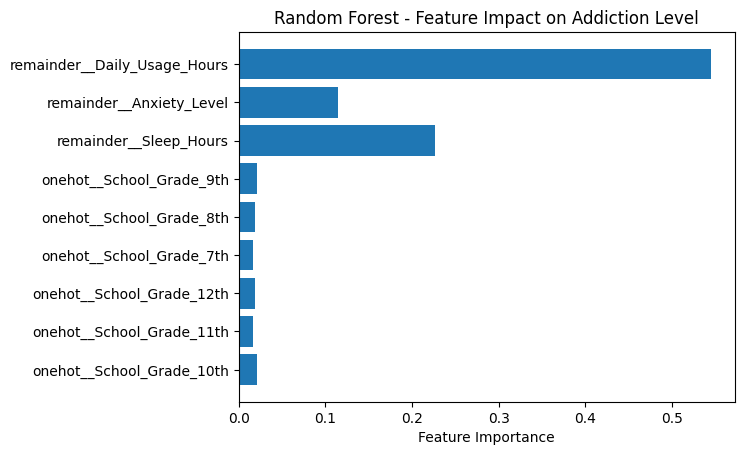

In [20]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_

# Get the feature names after one-hot encoding
# The get_feature_names_out() method requires the input feature names
feature_names = preprocessor.get_feature_names_out(features)

plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest - Feature Impact on Addiction Level")
plt.show()

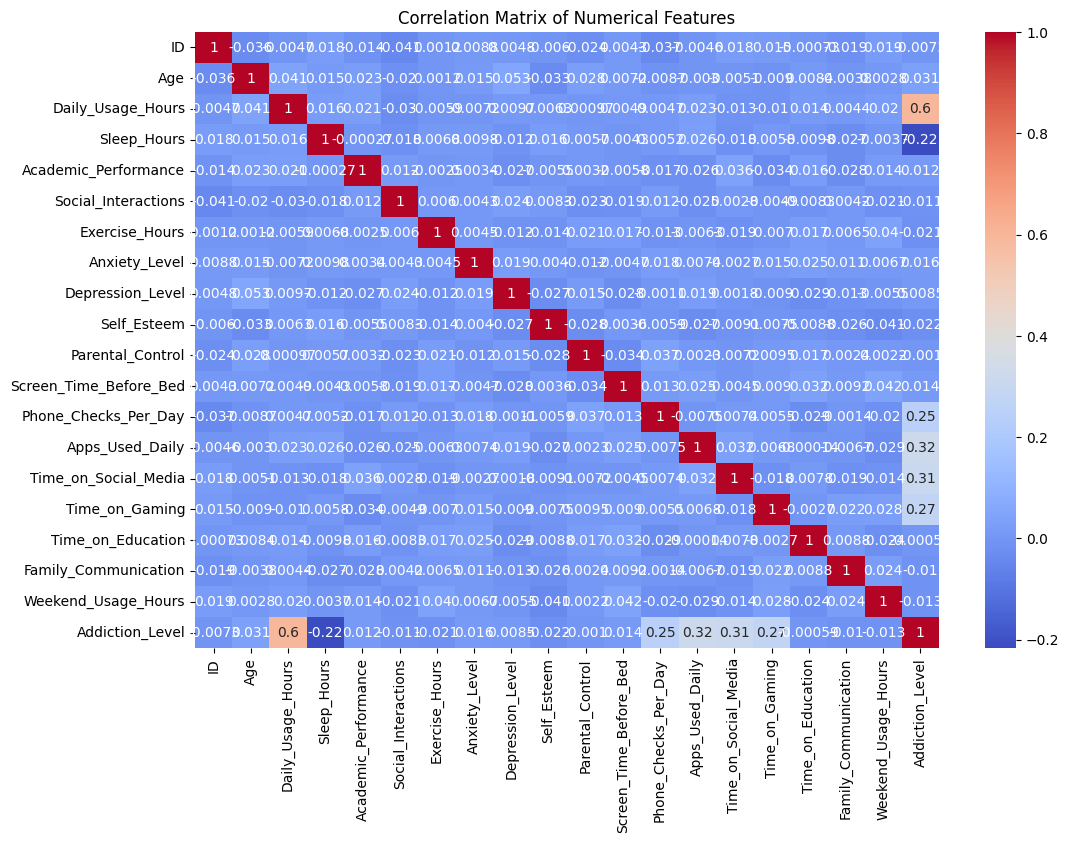

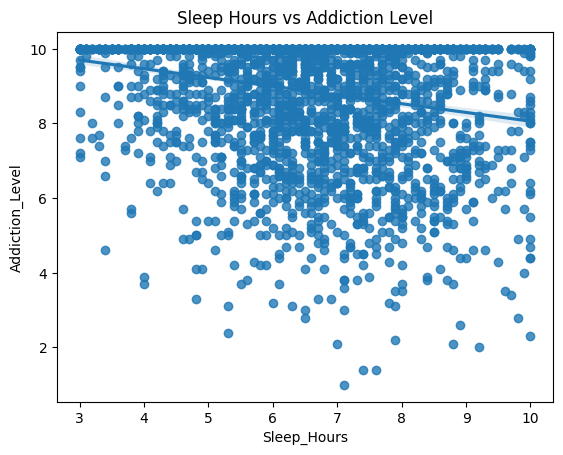

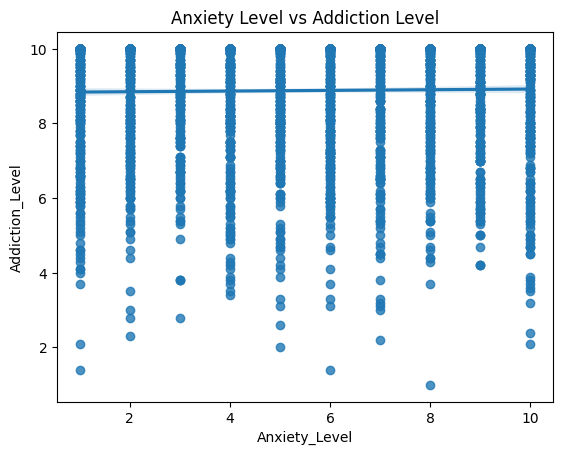

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation Matrix
plt.figure(figsize=(12, 8)) # Adjust figure size for better readability
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Individual relationships (using correct column names)
sns.regplot(x='Sleep_Hours', y='Addiction_Level', data=df)
plt.title('Sleep Hours vs Addiction Level')
plt.show()

sns.regplot(x='Anxiety_Level', y='Addiction_Level', data=df)
plt.title('Anxiety Level vs Addiction Level')
plt.show()

# For 'School_Grade', since it's categorical, a different visualization is needed.
# A box plot or violin plot would be more appropriate.
# sns.regplot(x='School_Grade', y='Addiction_Level', data=df) # This will still cause an error

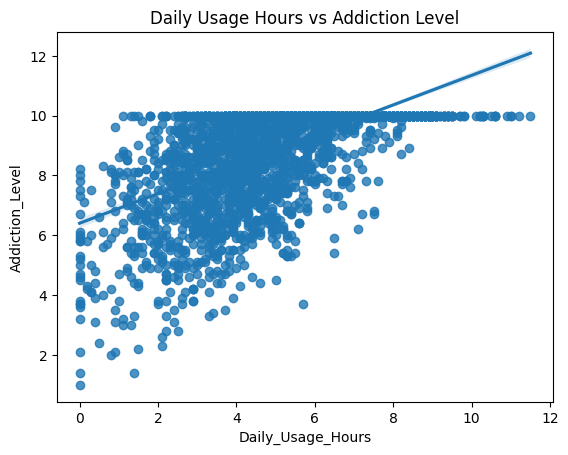

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x='Daily_Usage_Hours', y='Addiction_Level', data=df)
plt.title('Daily Usage Hours vs Addiction Level')
plt.show()

From this plot, we can observe:

    There appears to be a positive correlation between 'Daily_Usage_Hours' and 'Addiction_Level'. As daily usage hours increase, the addiction level tends to increase as well.
    The points are somewhat scattered around the regression line, indicating that while there is a trend, 'Daily_Usage_Hours' is not the sole determinant of 'Addiction_Level'.

This suggests that 'Daily_Usage_Hours' could be a more relevant feature for predicting addiction level compared to the features used in the previous models.

**let's try a Support Vector Machine (SVM) model for regression, which is called Support Vector Regression (SVR).**

In [26]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the SVR model
svr = SVR()
svr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svr = svr.predict(X_test)

# Evaluate the model
print("SVR MSE:", mean_squared_error(y_test, y_pred_svr))
print("SVR R² Score:", r2_score(y_test, y_pred_svr))

SVR MSE: 1.3642434836297725
SVR R² Score: 0.45848595895257194


# Task
Perform hyperparameter tuning for the Support Vector Machines model using GridSearchCV.

## Define the parameter grid

### Subtask:
Specify the range of values for the SVR hyperparameters (e.g., C, epsilon, kernel) that you want to search.


**Reasoning**:
Define the parameter grid for SVR hyperparameter tuning.



In [28]:
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['rbf']
}

## Set up gridsearchcv

### Subtask:
Create a GridSearchCV object, specifying the SVR model, the parameter grid, the scoring metric (e.g., R²), and the number of cross-validation folds.


**Reasoning**:
Instantiate a GridSearchCV object with the SVR model, parameter grid, scoring metric, and cross-validation folds as specified in the instructions.



In [30]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='r2', cv=5)

## Run the grid search

### Subtask:
Fit the GridSearchCV object to the training data to find the best combination of hyperparameters.


**Reasoning**:
Fit the GridSearchCV object to the training data to find the best combination of hyperparameters.



In [31]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 0.2],
                         'kernel': ['rbf']},
             scoring='r2')

## Evaluate the best model

### Subtask:
Get the best SVR model from the grid search and evaluate its performance on the test set using the chosen scoring metric.


**Reasoning**:
Get the best SVR model from the grid search, make predictions on the test set, calculate the R² score, and print the result.



In [32]:
# Get the best SVR model from the grid search
best_svr_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_best_svr = best_svr_model.predict(X_test)

# Calculate the R² score
r2_best_svr = r2_score(y_test, y_pred_best_svr)

# Print the R² score
print(f"R² Score for the best SVR model (from Grid Search): {r2_best_svr:.4f}")

R² Score for the best SVR model (from Grid Search): 0.4659


## Interpret the best parameters

### Subtask:
Examine the best hyperparameters found by the grid search.


**Reasoning**:
Access and print the best hyperparameters found by the grid search.



In [33]:
print("Best hyperparameters found by Grid Search:")
print(grid_search.best_params_)

Best hyperparameters found by Grid Search:
{'C': 1, 'epsilon': 0.2, 'kernel': 'rbf'}


## Summary:

### Data Analysis Key Findings

*   A hyperparameter grid for the SVR model was defined, including 'C': \[0.1, 1, 10], 'epsilon': \[0.01, 0.1, 0.2], and 'kernel': \['rbf'].
*   A `GridSearchCV` object was set up with the SVR estimator, the defined parameter grid, 'r2' as the scoring metric, and 5 cross-validation folds.
*   The grid search process identified the best hyperparameters as 'C': 1, 'epsilon': 0.2, and 'kernel': 'rbf'.
*   Evaluating the best SVR model on the test set resulted in an R² score of 0.4659.

### Insights or Next Steps

*   The R² score of 0.4659 suggests that the model explains about 46.59% of the variance in the target variable on the test set. Further tuning or exploring other models might be beneficial to improve performance.
*   The best hyperparameters found ('C': 1, 'epsilon': 0.2, 'kernel': 'rbf') can be used to train a final SVR model on the entire dataset (training and testing) for deployment or further analysis.
